Yes    3353
No     1757
Name: ever_married, dtype: int64


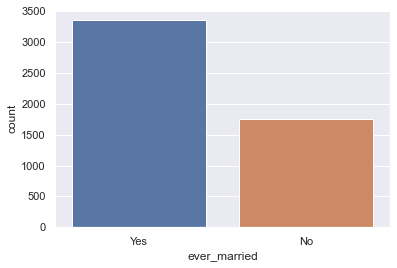

Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64


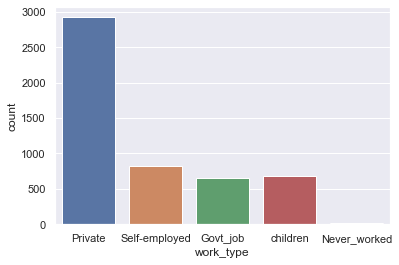

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


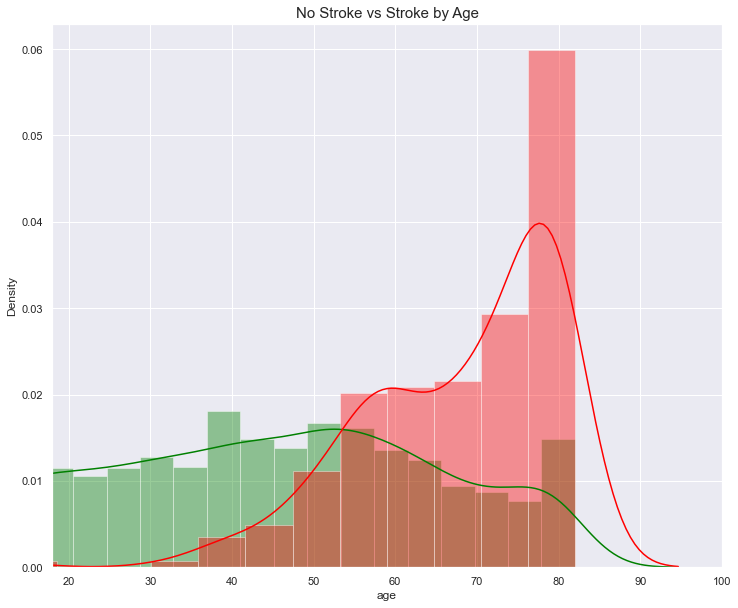

['bmi']
       id  gender   age hypertension heart_disease ever_married  \
0    9046    Male  67.0            0             1          Yes   
1   51676  Female  61.0            0             0          Yes   
2   31112    Male  80.0            0             1          Yes   
3   60182  Female  49.0            0             0          Yes   
4    1665  Female  79.0            1             0          Yes   
5   56669    Male  81.0            0             0          Yes   
6   53882    Male  74.0            1             1          Yes   
7   10434  Female  69.0            0             0           No   
8   27419  Female  59.0            0             0          Yes   
9   60491  Female  78.0            0             0          Yes   
10  12109  Female  81.0            1             0          Yes   
11  12095  Female  61.0            0             1          Yes   
12  12175  Female  54.0            0             0          Yes   
13   8213    Male  78.0            0             1    

In [25]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score
from sklearn.preprocessing import LabelEncoder
pd.set_option('display.max_rows', 25000)

data = pd.read_csv("healthcare-dataset-stroke-data.csv", low_memory = False)

print(data.ever_married.value_counts())
sns.set_theme(style="darkgrid")
ax = sns.countplot(data=data, x="ever_married")
plt.show()


print(data.work_type.value_counts())
sns.set_theme(style="darkgrid")
ax = sns.countplot(data=data, x="work_type")
plt.show()


plt.figure(figsize=(12,10))

sns.distplot(data[data['stroke'] == 0]["age"], color='green') # No Stroke - green
sns.distplot(data[data['stroke'] == 1]["age"], color='red') # Stroke - Red

plt.title('No Stroke vs Stroke by Age', fontsize=15)
plt.xlim([18,100])
plt.show()


# Get names of columns with missing values
cols_with_missing = [col for col in data.columns
                     if data[col].isnull().any()]
print(cols_with_missing)

# Imputation
imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
data = pd.DataFrame(imputer.fit_transform(data), columns=data.columns)

# Apply label encoder to each column with categorical data
le = LabelEncoder()
data['ever_married'] = le.fit_transform(data['ever_married'])
data['Residence_type'] = le.fit_transform(data['Residence_type'])

#data.replace(to_replace="Urban", value=1, inplace=True)
#data.replace(to_replace="Rural", value=0, inplace=True)

#data.replace(to_replace="Yes", value=1, inplace=True)
#data.replace(to_replace="No", value=0, inplace=True)

data = pd.get_dummies(data, columns=['work_type', 'smoking_status', 'gender'])
data.drop(columns=['id'], inplace=True)
data.head()

y = data['stroke']
y = y.astype(np.float32)
X = data.drop(['stroke'], axis=1)


X_train, X_test, y_train, y_test = train_test_split(X, y,  test_size=0.25 ,random_state=0)


rfClassifier = RandomForestClassifier()
rfClassifier.fit(X_train, y_train)
y_pred=rfClassifier.predict(X_test)


print('Accuracy Score: ' , metrics.accuracy_score(y_test, y_pred))
